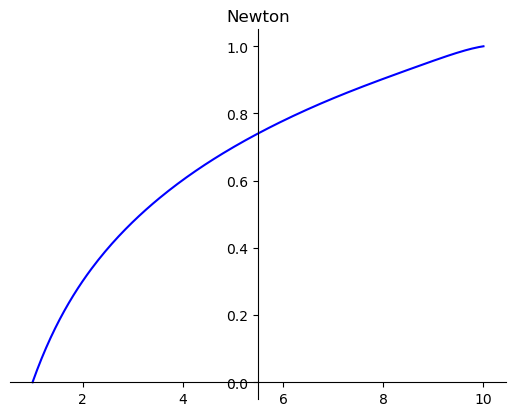

Многочлен имеет вид: P(x) = -5.23037918871284e-7*x**8 + 2.39880952380964e-5*x**7 - 0.000472523148148167*x**6 + 0.00524444444444459*x**5 - 0.0361819560185192*x**4 + 0.16187402777778*x**3 - 0.480506108906528*x**2 + 1.01640753968254*x - 0.666388888888889
В точке x = 5.25 функция принимает значение f(x) = 0.720178058966003


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *


def computeDividedDiff(points) -> list[list]:
    numOfLines = len(points) - 1
    dividedDifferences = []
    for i in range(0, numOfLines):
        dividedDifferences.append([])
        for j in range(0, numOfLines-i):
            if i == 0:
                s = (float(points[j + 1][1]) - float(points[j][1])) / (float(points[j + 1][0]) - float(points[j][0]))
                dividedDifferences[i].append(s)
            else:
                s = (dividedDifferences[i-1][j+1] - dividedDifferences[i-1][j])/(float(points[i +j+1][0]) - float(points[j][0]))
                dividedDifferences[i].append(s)
    return dividedDifferences


def interpolation(points):
    dividedDifferences = computeDividedDiff(points)
    y, x, s = symbols("y,x,s")
    y = float(points[0][1])
    for i in range(1, len(points)):
        s = 1
        for j in range(0, i):
            s *= x - float(points[j][0])
        y += expand(s)*dividedDifferences[i-1][0]
    return y


def computeFunc(y, x, arr) -> list:
    newArr = []
    for i in range(0, len(arr)):
        newArr.append(float(y.subs(x, arr[i])))
    return newArr


points = []

with open('C:\\Users\hambi\source\jupyter\input2.txt', 'r') as f:
    numOfPoints = int(f.readline())
    for i in range(0, numOfPoints):
        string = f.readline()
        points.append(list(map(float, string.split())))

y,x = symbols("y,x")               
y = interpolation(points)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

arr = np.linspace(1,10,200)

plt.plot(arr,computeFunc(y,x,arr), 'b')
plt.title("Newton")
plt.show()

print("Многочлен имеет вид: P(x) = " + str(y))
print("В точке x = 5.25 функция принимает значение f(x) =",y.subs(x,5.25))